4.	Design a deep CNN architecture for image classification with a specific focus on handling small datasets.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
import time

def CNN(input_shape, num_classes):
    Model = Sequential()

    Model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=input_shape))
    Model.add(MaxPooling2D(pool_size=(2,2)))
    Model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    Model.add(MaxPooling2D(pool_size=(2,2)))
    Model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    Model.add(MaxPooling2D(pool_size=(2,2)))

    Model.add(Flatten())

    Model.add(Dropout(0.5))
    Model.add(Dense(512, activation='relu'))
    Model.add(Dense(num_classes, activation='softmax'))

    return Model

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train.astype('float32')/255.0, X_test.astype('float32')/255.0

input_shape = X_train.shape[1:]
num_classes = 10

model = CNN(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_297 (Conv2D)             │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_298 (Conv2D)             │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_299 (Conv2D)             │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,362 (829.54 KB)

 Trainable params: 212,362 (829.54 KB)

 Non-trainable params: 0 (0.00 B)

a.	Implement and experiment with advanced architectures such as Inception, ResNet, or DenseNet.

In [16]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, UpSampling2D

def ResNet(input_shape, num_classes):
    baseModel = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    
    for layers in baseModel.layers:
        layers.trainable = False

    layer = baseModel.output
    layer = GlobalAveragePooling2D()(layer)
    layer = Dense(128, activation='relu')(layer)
    layer = Dense(num_classes, activation='softmax')(layer)

    model = Model(inputs = baseModel.input, outputs = layer)

    return model

model = ResNet(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_47"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_11      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 38, 38, 3) │          0 │ input_layer_11[0… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 8, 8, 64)  │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 64)  │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 64)  │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 8, 8, 64)  │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_2_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 8, 8, 256) │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 8, 8, 256) │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 8, 8, 256) │      1,024 │ conv2_block1_3_c

 Total params: 23,851,274 (90.99 MB)

 Trainable params: 263,562 (1.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [17]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

def DenseNet(input_shape, num_classes):
    baseModel = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    
    for layers in baseModel.layers:
        layers.trainable = False

    layer = baseModel.output
    layer = GlobalAveragePooling2D()(layer)
    layer = Dense(128, activation='relu')(layer)
    layer = Dense(num_classes, activation='softmax')(layer)

    model = Model(inputs = baseModel.input, outputs = layer)

    return model

model = DenseNet(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_8    │ (None, 38, 38, 3) │          0 │ input_layer_12[0… │
│ (ZeroPadding2D)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 16, 16,    │      9,408 │ zero_padding2d_8… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 16, 16,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 16, 16,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_9    │ (None, 18, 18,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 8, 8, 64)  │          0 │ zero_padding2d_9… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 8, 8, 64)  │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 8, 8, 64)  │          0 │ conv2_block1_0_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 8, 8, 128) │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 8, 8, 128) │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 8, 8, 128) │          0 │ conv2_block1_1_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 8, 8, 32)  │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 8, 8, 96)  │          0 │ pool1[0][0],      │
│ (Concatenate)       │                   │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 8, 8, 96)  │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 8, 8, 96)  │          0 │ conv2_block2_0_b… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 8, 8, 128) │     12,288 │ conv2_block2_0_r

 Total params: 7,169,994 (27.35 MB)

 Trainable params: 132,490 (517.54 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

b.	 Analyze the impact of different architectures on training time, convergence, and model performance.

Training CNN
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.2960 - loss: 1.8775 - val_accuracy: 0.5117 - val_loss: 1.3412
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4927 - loss: 1.3848 - val_accuracy: 0.5645 - val_loss: 1.2126
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5559 - loss: 1.2406 - val_accuracy: 0.6119 - val_loss: 1.0966
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5862 - loss: 1.1606 - val_accuracy: 0.6293 - val_loss: 1.0633
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.6015 - loss: 1.1121 - val_accuracy: 0.6504 - val_loss: 1.0067
Training Time:- 164.70s
Evaluation of CNN
Testing Loss:- 1.01
Testing Accuracy:- 0.65
Training ResNet
Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 247s 155ms/step - accuracy: 0.2049 - loss: 2.1681 - val_accuracy: 0.2895 - val_loss: 1.9670
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 276s 176ms/step - accuracy: 0.3058 - loss: 1.9122 - val_

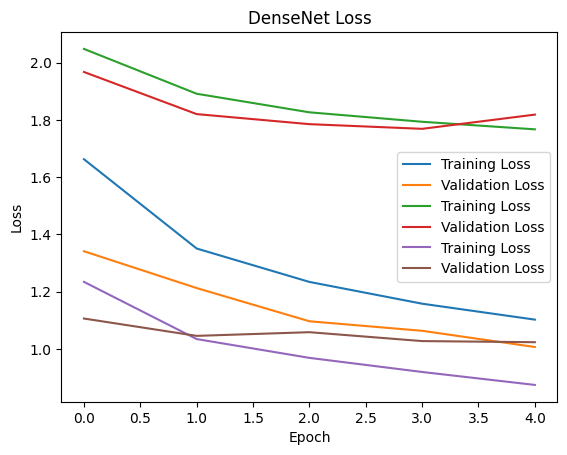

In [18]:
import time
import matplotlib.pyplot as plt

def TrainModel(Model, ModelName):
    print(f"Training {ModelName}")
    start_time = time.time()
    Model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    History = Model.fit(X_train, y_train, batch_size=32, epochs=5, validation_data = (X_test, y_test) )
    end_time = time.time()
    training_time = end_time - start_time
    print(f"Training Time:- {training_time:.2f}s")

    plt.plot(History.history['loss'], label='Training Loss')
    plt.plot(History.history['val_loss'], label='Validation Loss')
    plt.title(f"{ModelName} Loss")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show

    return training_time, history

def Evaluate(Model, ModelName):
    print(f"Evaluation of {ModelName}")
    loss, accuracy = Model.evaluate(X_test, y_test, verbose=0)
    print(f"Testing Loss:- {loss:.2f}")
    print(f"Testing Accuracy:- {accuracy:.2f}")
    return loss, accuracy

Models = {
    "CNN": CNN(input_shape, 10),
    "ResNet": ResNet(input_shape, 10),
    "DenseNet": DenseNet(input_shape, 10)
}

result = {}

for name, model in Models.items():
    training_time, _ = TrainModel(model, name)
    testing_loss, testing_accuracy = Evaluate(model, name)
    result[name] = {"Train Time": training_time,
                    "Test Loss": testing_loss,
                    "Test Accuracy": testing_accuracy}

print("RESULTS:-")
for name, metrics in result.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print()